In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree


In [86]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.22.1


In [263]:
df_metricas = pd.read_csv('microdadosMetricasAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_metricas = df_metricas.loc[:, ~df_metricas.columns.str.contains('^Unnamed')]
df_metricas

Modelo  Max_Error    MAE    R²       MSE  CV scores mean  \
0      Random Forest     485.11  58.77  0.40   5428.39            0.40   
1   Regressão Linear     513.67  57.01  0.44   5072.02            0.43   
2        Rede Neural     548.89  60.15  0.35   5806.91            0.36   
3  Árvore de decisão     647.80  78.71 -0.12  10057.61           -0.11   

   CV scores std  Tempo de processamento  
0           0.01                    2.36  
1           0.01                    2.36  
2           0.03                    2.36  
3           0.01                    2.36

In [200]:
df_resposta = pd.read_csv('microdadosRespostaAlagoas.csv', sep = ';', encoding='ISO 8859-1')
print(df_resposta.shape)
df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural']]= df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural' ]].applymap("{0:.1f}".format).astype('float64')
df_resposta

(19382, 7)


Unnamed: 0  NU_INSCRICAO  NU_NOTA_MT  NU_NOTA_MT_Random Forest  \
0           59340  180013272216       571.4                     602.8   
1           10626  180007664987       587.8                     490.4   
2           18410  180007324620       390.9                     499.8   
3           16294  180008690383       479.3                     456.4   
4           59440  180013685090       480.2                     461.9   
...           ...           ...         ...                       ...   
19377       17858  180007217035       495.7                     480.4   
19378        9917  180008716811       459.4                     481.4   
19379       45121  180011130270       530.8                     474.9   
19380        3741  180007739742       456.2                     614.2   
19381       51183  180011867479       435.9                     464.7   

       NU_NOTA_MT_Regressão Linear  NU_NOTA_MT_Rede Neural  \
0                            594.1                   551.3   
1                            490.2                   467.2   
2                            466.8                   469.2   
3                            449.1                   415.9   
4                            486.0                   528.6   
...                            ...                     ...   
19377                        514.7                   501.5   
19378                        452.3                   446.9   
19379                        485.9                   520.5   
19380                        600.2                   596.7   
19381                        479.5                   469.0   

       NU_NOTA_MT_Árvore de decisão  
0                             533.0  
1                             431.9  
2                             432.6  
3                             467.7  
4                             414.9  
...                             ...  
19377                         491.7  
19378                         439.9  
19379                         539.4  
19380                         562.0  
19381                         419.3  

[19382 rows x 7 columns]

In [201]:
df_resposta = df_resposta.loc[:, ~df_resposta.columns.str.contains('^Unnamed')]
df_resposta.dtypes

NU_INSCRICAO                      int64
NU_NOTA_MT                      float64
NU_NOTA_MT_Random Forest        float64
NU_NOTA_MT_Regressão Linear     float64
NU_NOTA_MT_Rede Neural          float64
NU_NOTA_MT_Árvore de decisão    float64
dtype: object

In [202]:

df_resposta



NU_INSCRICAO  NU_NOTA_MT  NU_NOTA_MT_Random Forest  \
0      180013272216       571.4                     602.8   
1      180007664987       587.8                     490.4   
2      180007324620       390.9                     499.8   
3      180008690383       479.3                     456.4   
4      180013685090       480.2                     461.9   
...             ...         ...                       ...   
19377  180007217035       495.7                     480.4   
19378  180008716811       459.4                     481.4   
19379  180011130270       530.8                     474.9   
19380  180007739742       456.2                     614.2   
19381  180011867479       435.9                     464.7   

       NU_NOTA_MT_Regressão Linear  NU_NOTA_MT_Rede Neural  \
0                            594.1                   551.3   
1                            490.2                   467.2   
2                            466.8                   469.2   
3                            449.1                   415.9   
4                            486.0                   528.6   
...                            ...                     ...   
19377                        514.7                   501.5   
19378                        452.3                   446.9   
19379                        485.9                   520.5   
19380                        600.2                   596.7   
19381                        479.5                   469.0   

       NU_NOTA_MT_Árvore de decisão  
0                             533.0  
1                             431.9  
2                             432.6  
3                             467.7  
4                             414.9  
...                             ...  
19377                         491.7  
19378                         439.9  
19379                         539.4  
19380                         562.0  
19381                         419.3  

[19382 rows x 6 columns]

In [ ]:
index = range(1, 5)
fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(x,
           vert=False,)
ax.set_title("Permutation Importances Random Forest (test set)", fontsize=15)

fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
#plt.savefig('imagens/featuresImportances.png', format='png')

plt.show()


In [196]:

colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']
df_resposta['NU_NOTA_MT_Rede Neural']

0        551.3
1        467.2
2        469.2
3        415.9
4        528.6
         ...  
19377    501.5
19378    446.9
19379    520.5
19380    596.7
19381    469.0
Name: NU_NOTA_MT_Rede Neural, Length: 19382, dtype: object

Text(0.5, 1.0, 'Distribíção das notas de matemática de acordo com cada modelo preditivo')

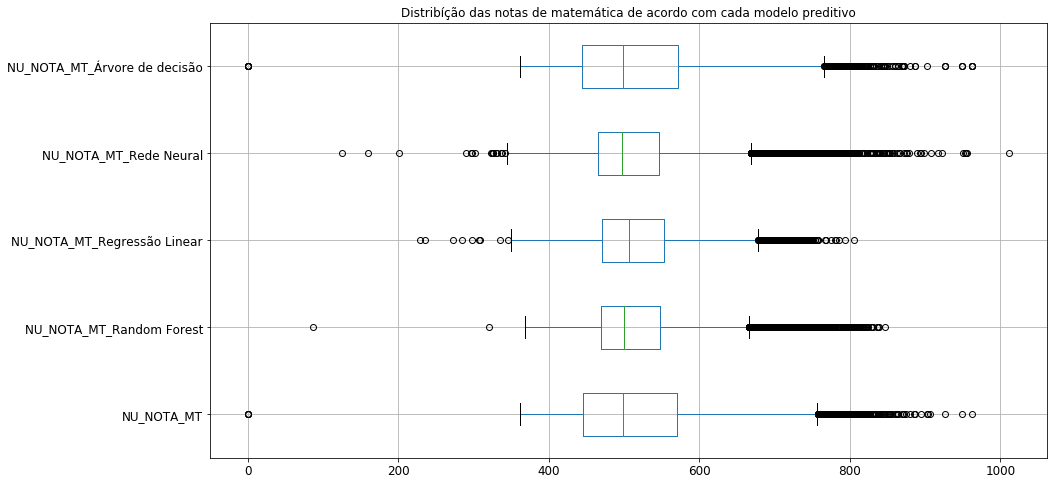

In [221]:
boxplot = df_resposta.boxplot(column=colunas, figsize=(15,8), fontsize=12, vert=False)
boxplot
boxplot.set_title('Distribíção das notas de matemática de acordo com cada modelo preditivo')


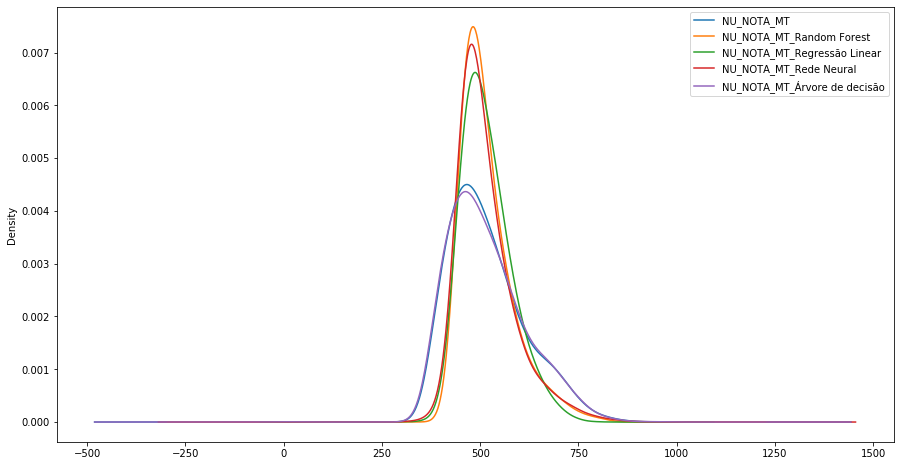

In [230]:
df = df_resposta[colunas]
df.plot.kde(bw_method=0.3, figsize=(15,8))

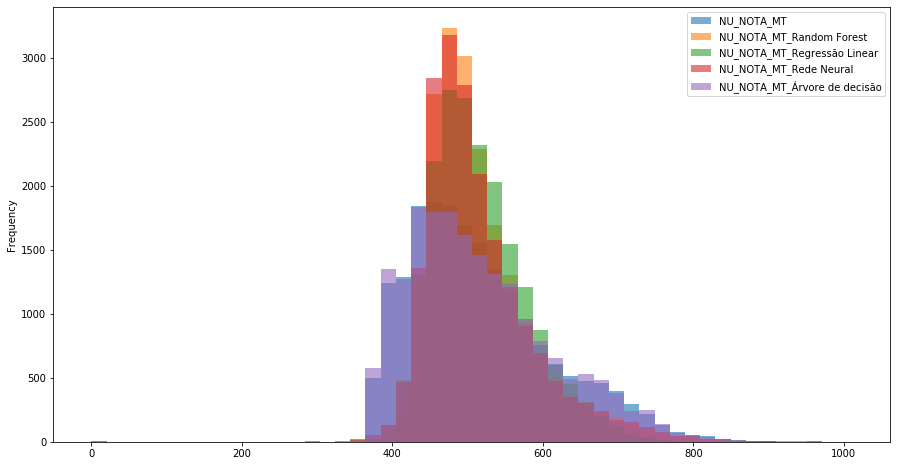

In [249]:
ax = df.plot.hist(bins=50, alpha=0.6, figsize=(15,8))

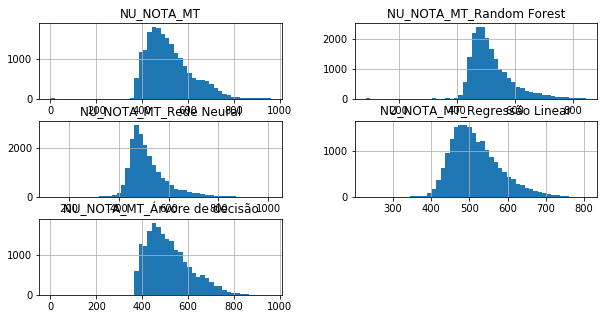

In [246]:
hist = df.hist(bins=50, figsize = (10,5))

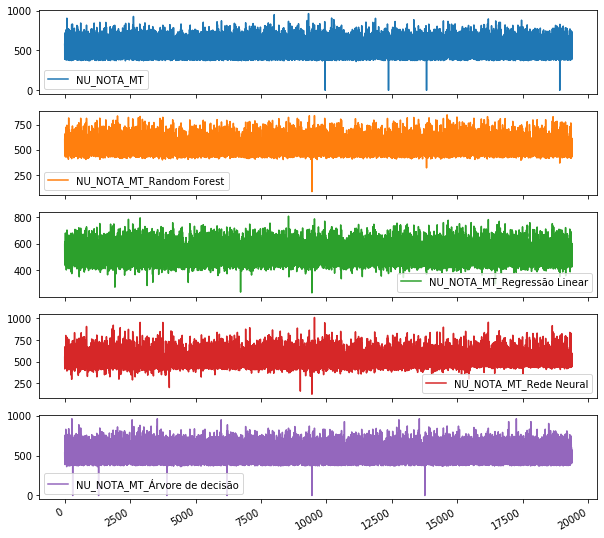

In [255]:
axes = df.plot.line(subplots = True, figsize = (10,10))

In [179]:
size = 100
data = df_resposta.sample(size).sort_values(by='NU_NOTA_MT')
data = data[colunas]
x = np.arange(0, size)
data.set_index([x])


NU_NOTA_MT  NU_NOTA_MT_Random Forest  NU_NOTA_MT_Regressão Linear  \
0        384.7                    495.20                   489.627596   
1        385.1                    521.88                   507.622705   
2        394.5                    440.34                   435.837995   
3        399.0                    532.09                   568.794502   
4        399.3                    517.59                   489.714827   
..         ...                       ...                          ...   
95       717.9                    602.22                   654.939624   
96       728.7                    633.01                   604.113440   
97       745.0                    719.71                   650.593335   
98       763.7                    665.99                   688.035676   
99       795.6                    666.46                   644.433933   

    NU_NOTA_MT_Rede Neural  NU_NOTA_MT_Árvore de decisão  
0               447.055760                         475.7  
1               497.632849                         434.8  
2               472.652098                         509.4  
3               533.900942                         468.3  
4               499.921053                         452.5  
..                     ...                           ...  
95              694.488135                         536.0  
96              579.103082                         525.0  
97              731.097465                         710.2  
98              670.226649                         500.8  
99              739.467980                         743.0  

[100 rows x 5 columns]

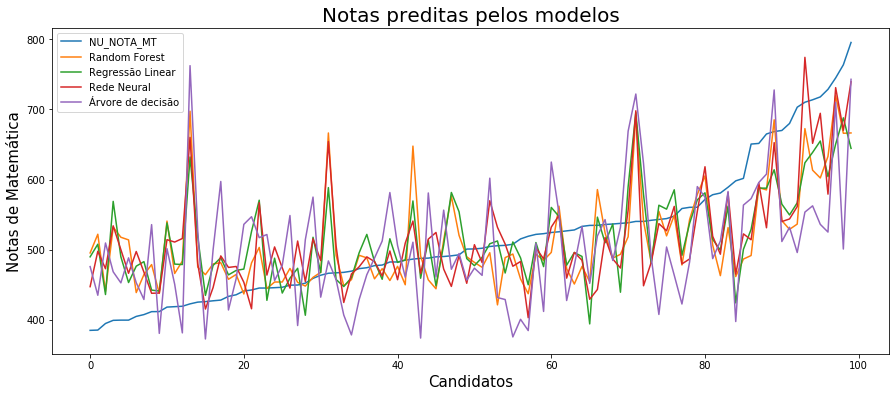

In [212]:

labels = ['NU_NOTA_MT','Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']
colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']

x = np.arange(0, size)

fig, ax = plt.subplots(figsize=(15, 6))

for label, coluna in zip(labels, colunas):
    ax.plot(x, data[coluna], label = label)

plt.title("Notas preditas pelos modelos", fontsize=20)
plt.xlabel('Candidatos',fontsize=15 )
plt.ylabel('Notas de Matemática', fontsize=15)

plt.legend()
plt.show()

In [19]:
x = np.arange(0, len(df_resposta['NU_INSCRICAO']), 1000)
x

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000])

In [39]:
df_resposta.loc[10:, 'NU_NOTA_MT']

10       506.7
11       470.5
12       443.3
13       685.3
14       392.2
         ...  
19377    495.7
19378    459.4
19379    530.8
19380    456.2
19381    435.9
Name: NU_NOTA_MT, Length: 19372, dtype: float64